# Forecasting with Moving Averages

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gld = pdr.get_data_yahoo('GLD', start='2013-01-01')
gld.drop('Adj Close', axis=1)
gld = round(gld,2)

In [5]:
gld['5-day'] = gld['Close'].rolling(5).mean().shift()
gld.head(10)

,High,Low,Open,Close,Volume,Adj Close,5-day
Date,,,,,,,
2013-01-02,164.14,163.14,163.49,163.17,10431800,163.17,NaN
2013-01-03,162.88,160.83,162.48,161.20,16117500,161.20,NaN
2013-01-04,160.63,158.89,159.52,160.44,19179800,160.44,NaN
2013-01-07,159.96,159.15,159.36,159.43,9361800,159.43,NaN
2013-01-08,160.99,160.01,160.46,160.56,7694800,160.56,NaN
2013-01-09,160.83,159.90,160.77,160.49,8334200,160.49,160.960
2013-01-10,162.56,161.61,161.61,161.98,11432600,161.98,160.424
2013-01-11,161.90,160.11,161.86,161.06,13675600,161.06,160.580
2013-01-14,161.97,161.13,161.88,161.54,7289000,161.54,160.704


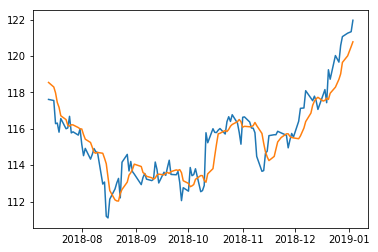

In [7]:
plt.plot(gld['Close'][-120:])
plt.plot(gld['5-day'][-120:])

In [8]:
# Mean absolute deviation
gld['MAD'] = np.abs(gld['Close']-gld['5-day'])

In [9]:
gld['MAD'].mean()

1.2334691439946852

In [10]:
# Mean Percent Error
gld['MAPE'] = gld['MAD'] / gld['Close']
gld['MAPE'].mean()

0.01015011724683513

In [12]:
# Mean Squared Error
gld['MSE'] = gld['MAD'] ** 2
MSE = gld['MSE'].mean()

In [15]:
RMSE = np.sqrt(MSE)
RMSE

1.7205652525612454